<a href="https://colab.research.google.com/github/mustafajut/CNN_RNN/blob/main/Build_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 building a simple neural network using PyTorch and experimenting with different activation functions. We’ll also cover hyperparameter optimization and regularization techniques.

**Build a simple neural network using pytorch
Experiment with different activation functions and observe their
impact.
Practical: Optimize the training process by adjusting
hyperparameters and implementing regularization
techniques.
Evaluate using training testing graphs and classification report of simple nn and optimized nn**

 **Setup and Import Libraries**
First, make sure you have PyTorch installed. If not, install it via pip:

In [ ]:
pip install torch torchvision matplotlib scikit-learn

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**2. Load and Preprocess Data**
Load and preprocess the MNIST dataset:

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Load data into DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34230158.78it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1107425.09it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9403542.02it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6840405.30it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**3. Define Neural Network Models**
Define models with different activation functions:

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, activation_fn):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.activation_fn = activation_fn
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.activation_fn(self.fc1(x))
        x = self.activation_fn(self.fc2(x))
        x = self.fc3(x)
        return x

# Different activation functions
activation_functions = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'LeakyReLU': nn.LeakyReLU(0.1)
}

**4. Define Training and Evaluation Functions**
Train and evaluate models:

In [ ]:
def train_and_evaluate(model, criterion, optimizer, train_loader, test_loader, epochs=10):
    history = {'loss': []}

    # Training the model
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        history['loss'].append(avg_loss)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

    # Evaluating the model
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

    # Print confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Training loss plot
    plt.plot(history['loss'])
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


**5. Experiment with Different Activation Functions**
Train and evaluate the models using different activation functions:


Training with ReLU activation function
Epoch [1/10], Loss: 0.3894
Epoch [2/10], Loss: 0.1862
Epoch [3/10], Loss: 0.1324
Epoch [4/10], Loss: 0.1096
Epoch [5/10], Loss: 0.0930
Epoch [6/10], Loss: 0.0820
Epoch [7/10], Loss: 0.0705
Epoch [8/10], Loss: 0.0643
Epoch [9/10], Loss: 0.0595
Epoch [10/10], Loss: 0.0549

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.96      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.99      0.96      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg   

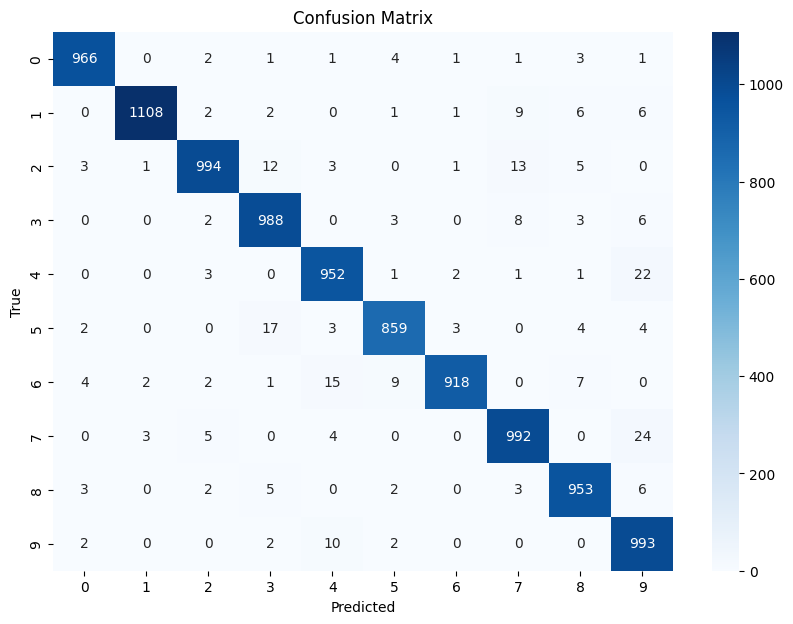

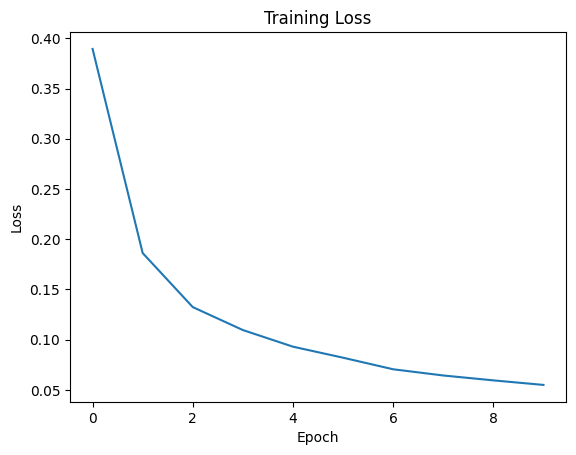


Training with Sigmoid activation function
Epoch [1/10], Loss: 0.6412
Epoch [2/10], Loss: 0.2158
Epoch [3/10], Loss: 0.1528
Epoch [4/10], Loss: 0.1190
Epoch [5/10], Loss: 0.0985
Epoch [6/10], Loss: 0.0832
Epoch [7/10], Loss: 0.0744
Epoch [8/10], Loss: 0.0649
Epoch [9/10], Loss: 0.0595
Epoch [10/10], Loss: 0.0517

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg

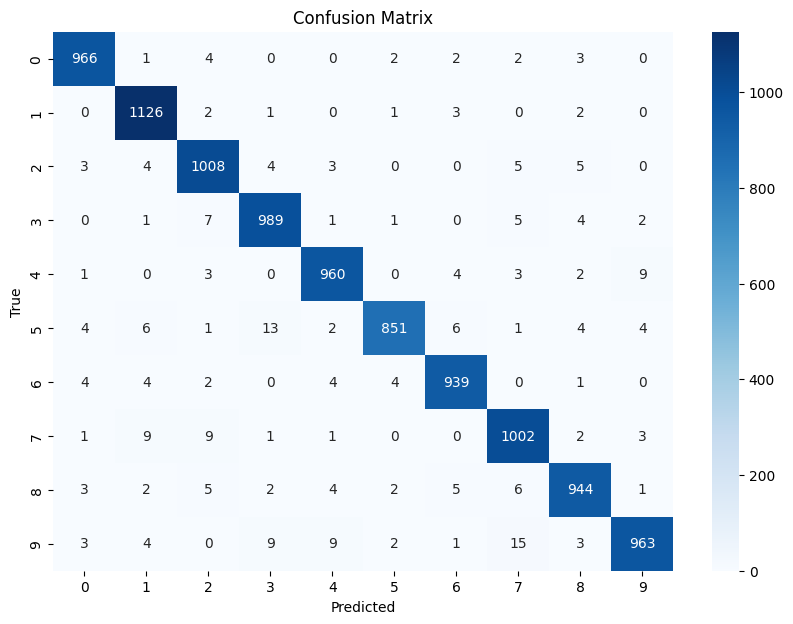

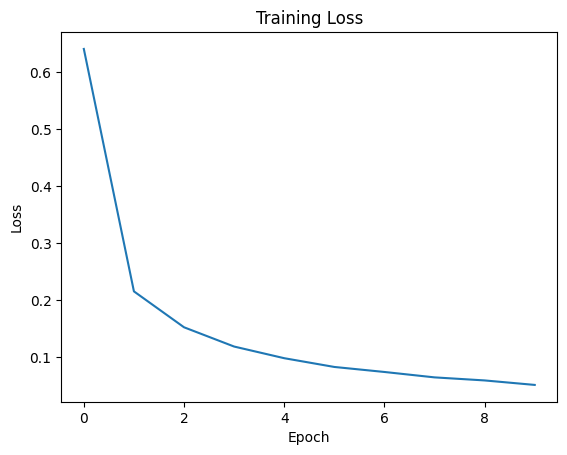


Training with Tanh activation function
Epoch [1/10], Loss: 0.3457
Epoch [2/10], Loss: 0.1636
Epoch [3/10], Loss: 0.1310
Epoch [4/10], Loss: 0.1139
Epoch [5/10], Loss: 0.1037
Epoch [6/10], Loss: 0.0943
Epoch [7/10], Loss: 0.0936
Epoch [8/10], Loss: 0.0888
Epoch [9/10], Loss: 0.0771
Epoch [10/10], Loss: 0.0779

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.94      0.96       892
           6       0.98      0.96      0.97       958
           7       0.98      0.95      0.97      1028
           8       0.92      0.98      0.95       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg   

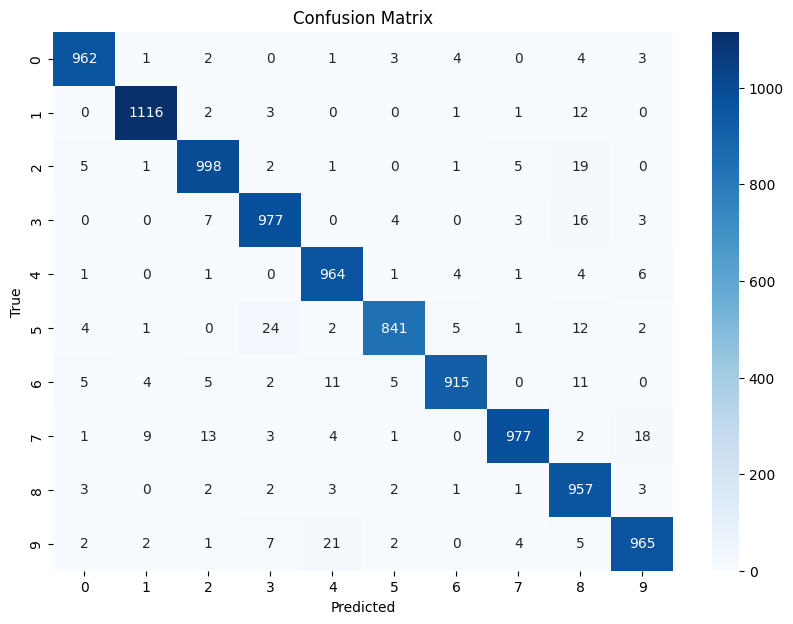

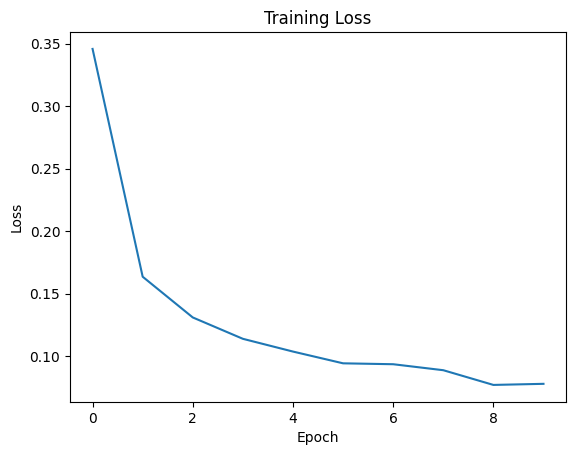


Training with LeakyReLU activation function
Epoch [1/10], Loss: 0.3662
Epoch [2/10], Loss: 0.1676
Epoch [3/10], Loss: 0.1232
Epoch [4/10], Loss: 0.1005
Epoch [5/10], Loss: 0.0877
Epoch [6/10], Loss: 0.0757
Epoch [7/10], Loss: 0.0657
Epoch [8/10], Loss: 0.0600
Epoch [9/10], Loss: 0.0530
Epoch [10/10], Loss: 0.0498

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       1.00      0.97      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.94      0.96       892
           6       0.95      0.99      0.97       958
           7       0.95      0.99      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro a

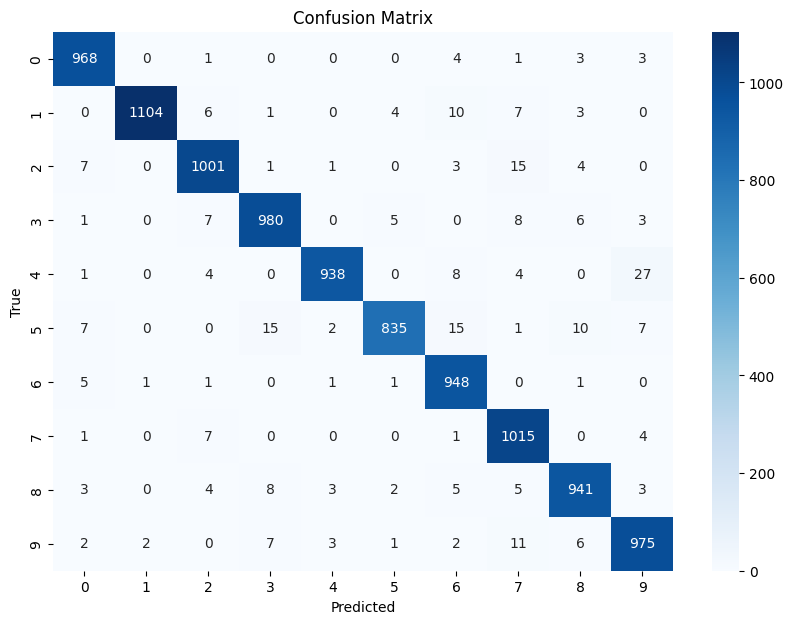

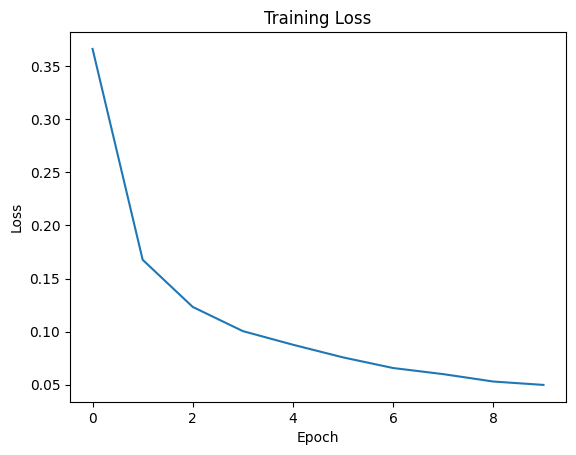

In [ ]:
for name, activation_fn in activation_functions.items():
    print(f"\nTraining with {name} activation function")

    model = SimpleNN(activation_fn)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_and_evaluate(model, criterion, optimizer, train_loader, test_loader)

**6. Hyperparameter Optimization and Regularization**
Adjust hyperparameters such as learning rate and dropout:

In [ ]:
class OptimizedNN(nn.Module):
    def __init__(self, activation_fn, dropout_rate=0.5):
        super(OptimizedNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.activation_fn = activation_fn
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.activation_fn(self.fc1(x))
        x = self.dropout(x)
        x = self.activation_fn(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

def train_and_evaluate_optimized(model, criterion, optimizer, train_loader, test_loader, epochs=10):
    history = {'loss': []}

    # Training the model
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        history['loss'].append(avg_loss)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss}')

    # Evaluating the model
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

    # Print confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Training and validation loss plot
    plt.plot(history['loss'])
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

**Example: Train with Optimized Hyperparameters**


Training with ReLU activation function and optimized parameters
Epoch [1/10], Loss: 0.8372096649682852
Epoch [2/10], Loss: 0.5323344836992495
Epoch [3/10], Loss: 0.47565434460065514
Epoch [4/10], Loss: 0.445934434943616
Epoch [5/10], Loss: 0.42135117466706457
Epoch [6/10], Loss: 0.4152100200274352
Epoch [7/10], Loss: 0.3965098999107062
Epoch [8/10], Loss: 0.39147566911826004
Epoch [9/10], Loss: 0.38445621330156
Epoch [10/10], Loss: 0.3762493565487963

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.95      0.94      1032
           3       0.96      0.94      0.95      1010
           4       0.94      0.96      0.95       982
           5       0.96      0.89      0.93       892
           6       0.95      0.97      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.93      0.94

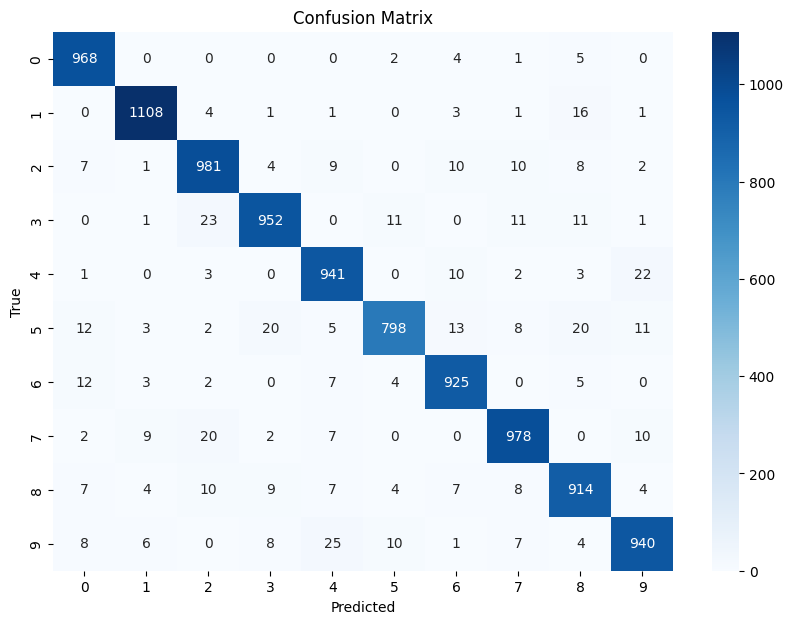

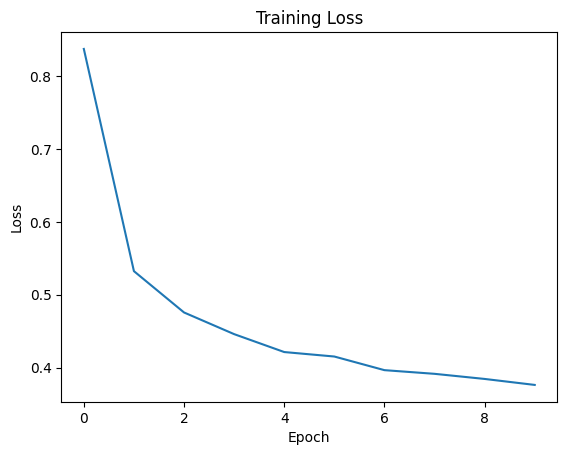


Training with Sigmoid activation function and optimized parameters
Epoch [1/10], Loss: 1.005013471536799
Epoch [2/10], Loss: 0.48559700718312376
Epoch [3/10], Loss: 0.4049149326551189
Epoch [4/10], Loss: 0.3612468687853198
Epoch [5/10], Loss: 0.33213586026608055
Epoch [6/10], Loss: 0.3140065867954226
Epoch [7/10], Loss: 0.29593193207754254
Epoch [8/10], Loss: 0.2833826903587402
Epoch [9/10], Loss: 0.2749302767511052
Epoch [10/10], Loss: 0.260778434725522

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.95      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.95      0.95      0.95       982
           5       0.96      0.92      0.94       892
           6       0.95      0.97      0.96       958
           7       0.95      0.96      0.95      1028
           8       0.97      

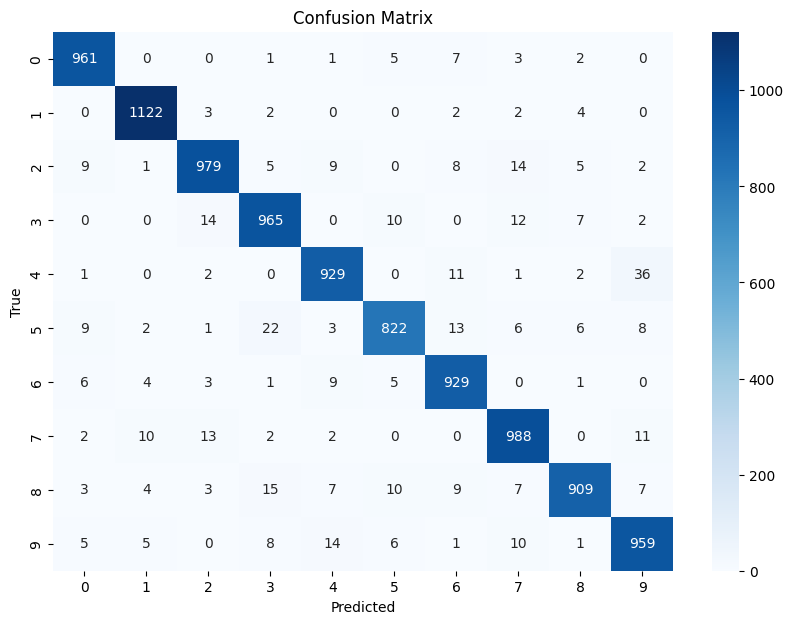

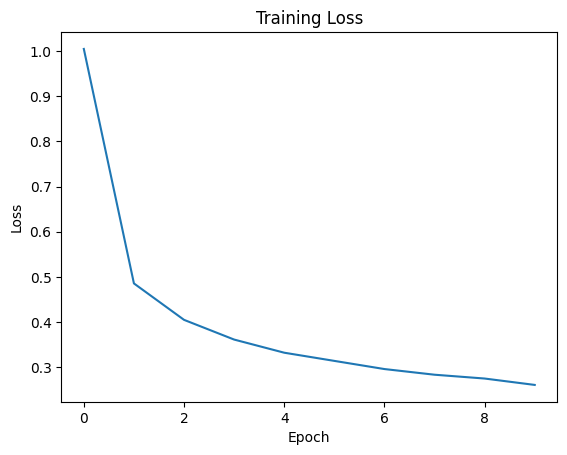


Training with Tanh activation function and optimized parameters
Epoch [1/10], Loss: 0.6029968133994511
Epoch [2/10], Loss: 0.4011508865810152
Epoch [3/10], Loss: 0.36366293935188604
Epoch [4/10], Loss: 0.34216543032861213
Epoch [5/10], Loss: 0.3282217225715168
Epoch [6/10], Loss: 0.3153197786002271
Epoch [7/10], Loss: 0.30641524987751995
Epoch [8/10], Loss: 0.2986177944107605
Epoch [9/10], Loss: 0.2943822886071988
Epoch [10/10], Loss: 0.2860255718533037

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.95      0.94      0.94      1010
           4       0.94      0.95      0.95       982
           5       0.94      0.93      0.93       892
           6       0.94      0.97      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.95      0

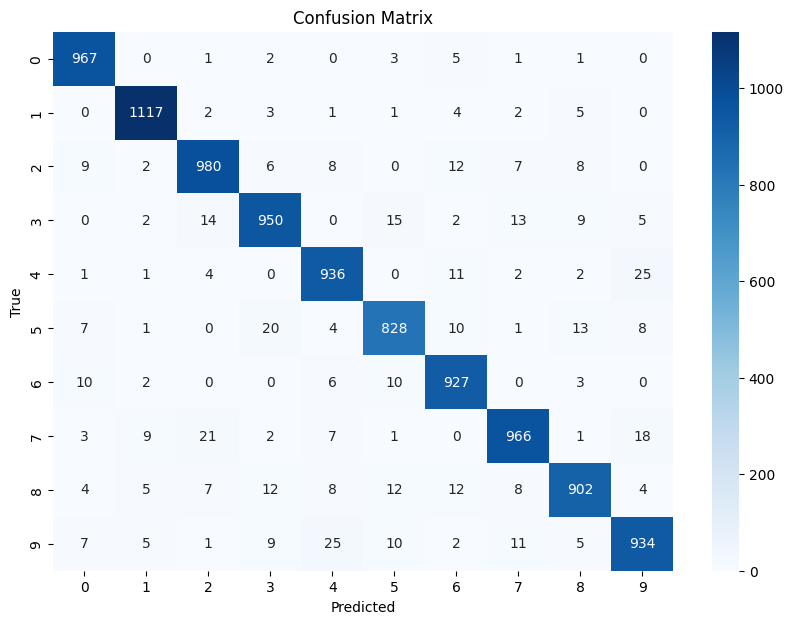

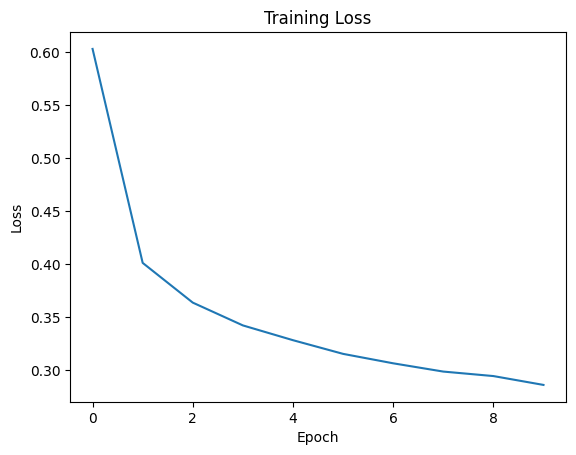


Training with LeakyReLU activation function and optimized parameters
Epoch [1/10], Loss: 0.6585314267797511
Epoch [2/10], Loss: 0.385357528281555
Epoch [3/10], Loss: 0.3341391597316463
Epoch [4/10], Loss: 0.31156643060669464
Epoch [5/10], Loss: 0.2937113806319389
Epoch [6/10], Loss: 0.2777605351052686
Epoch [7/10], Loss: 0.2702375946562491
Epoch [8/10], Loss: 0.26309787262397916
Epoch [9/10], Loss: 0.25674821186993424
Epoch [10/10], Loss: 0.24945895736024323

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.94      0.95       892
           6       0.93      0.98      0.95       958
           7       0.95      0.96      0.96      1028
           8       0.97  

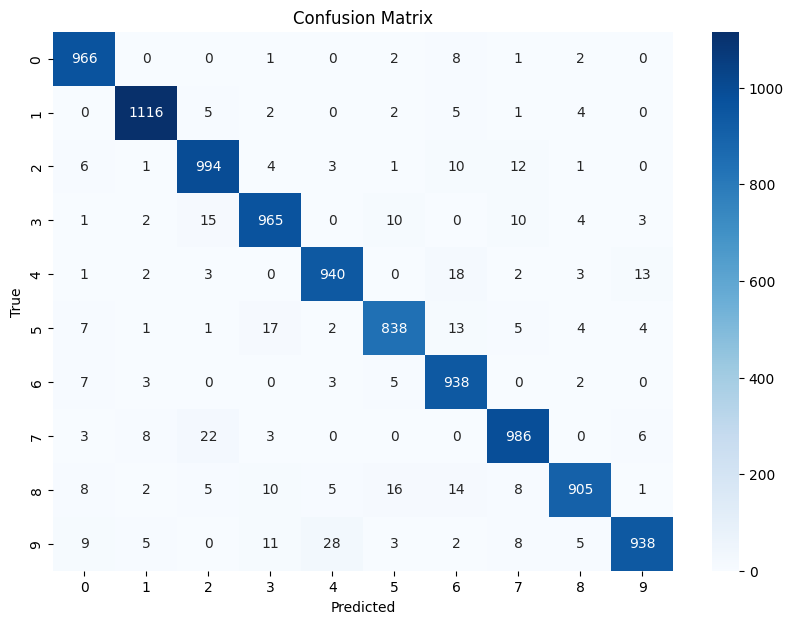

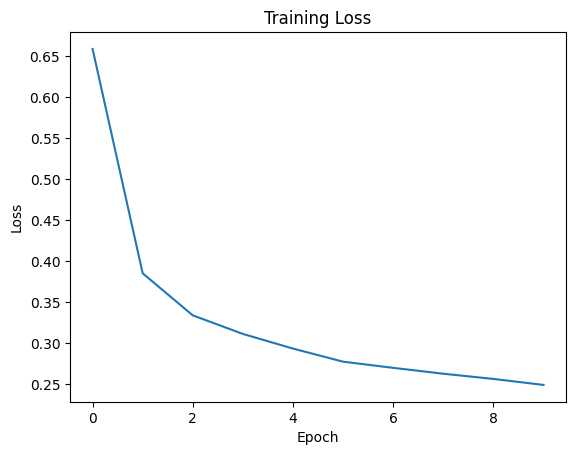

In [ ]:


for name, activation_fn in activation_functions.items():
    print(f"\nTraining with {name} activation function and optimized parameters")

    model = OptimizedNN(activation_fn, dropout_rate=0.5)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_and_evaluate_optimized(model, criterion, optimizer, train_loader, test_loader)